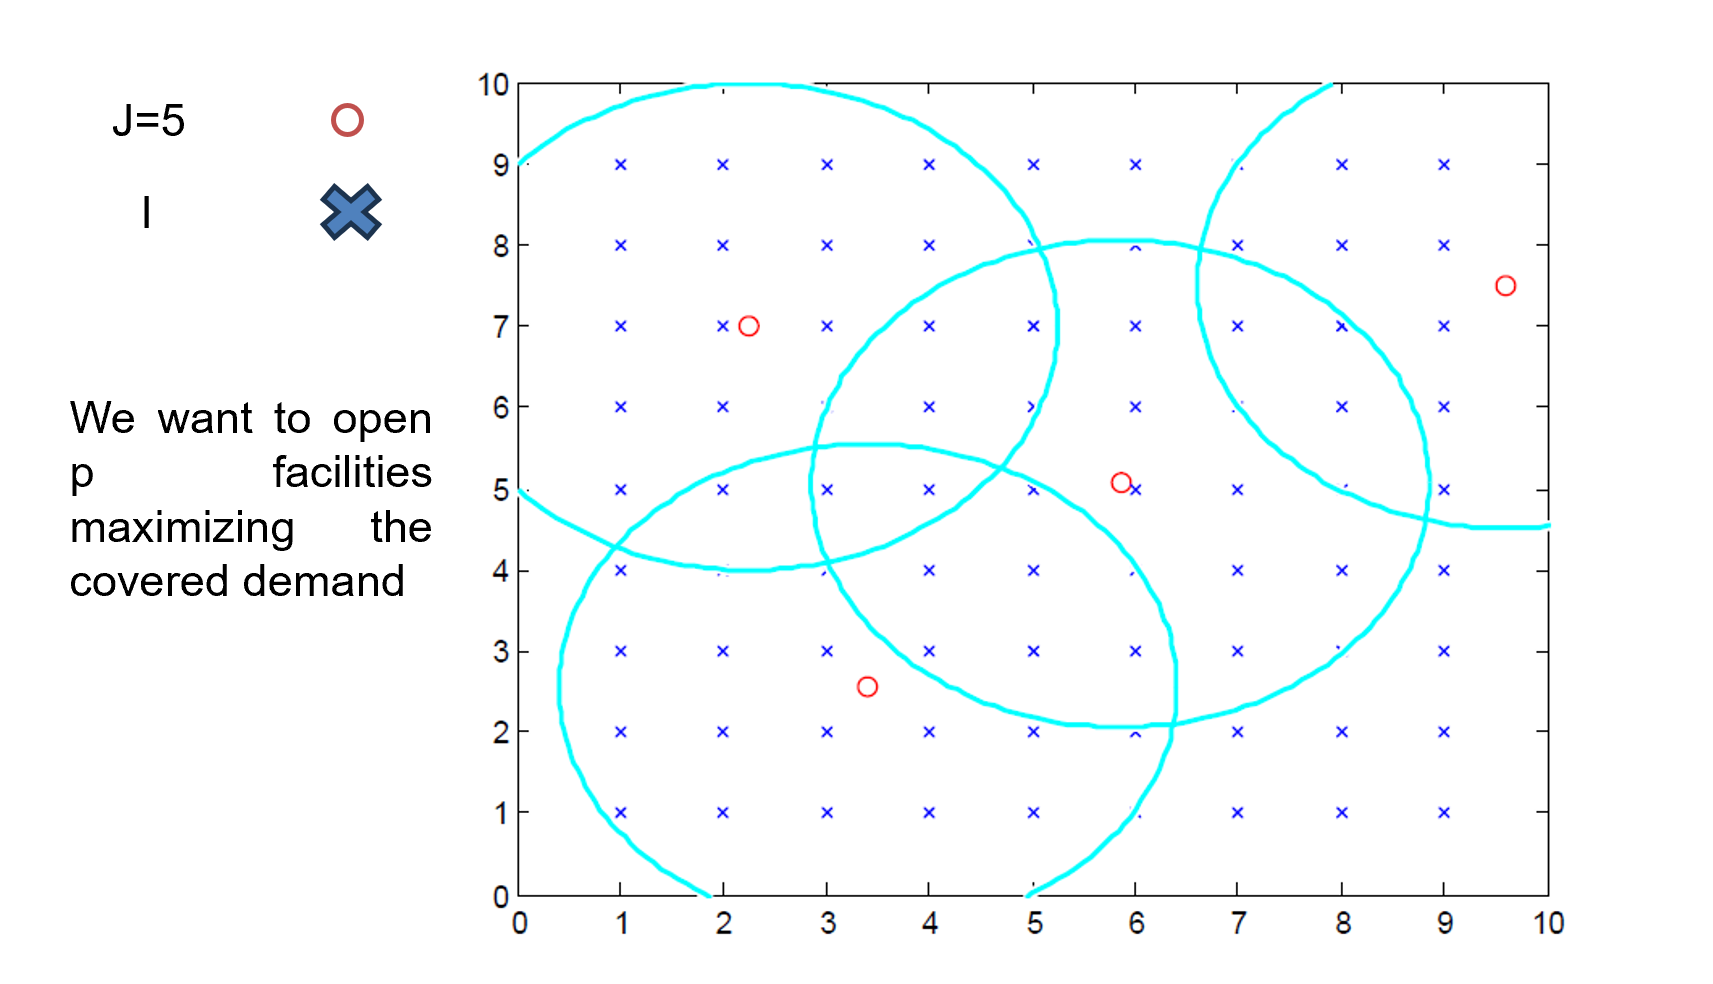

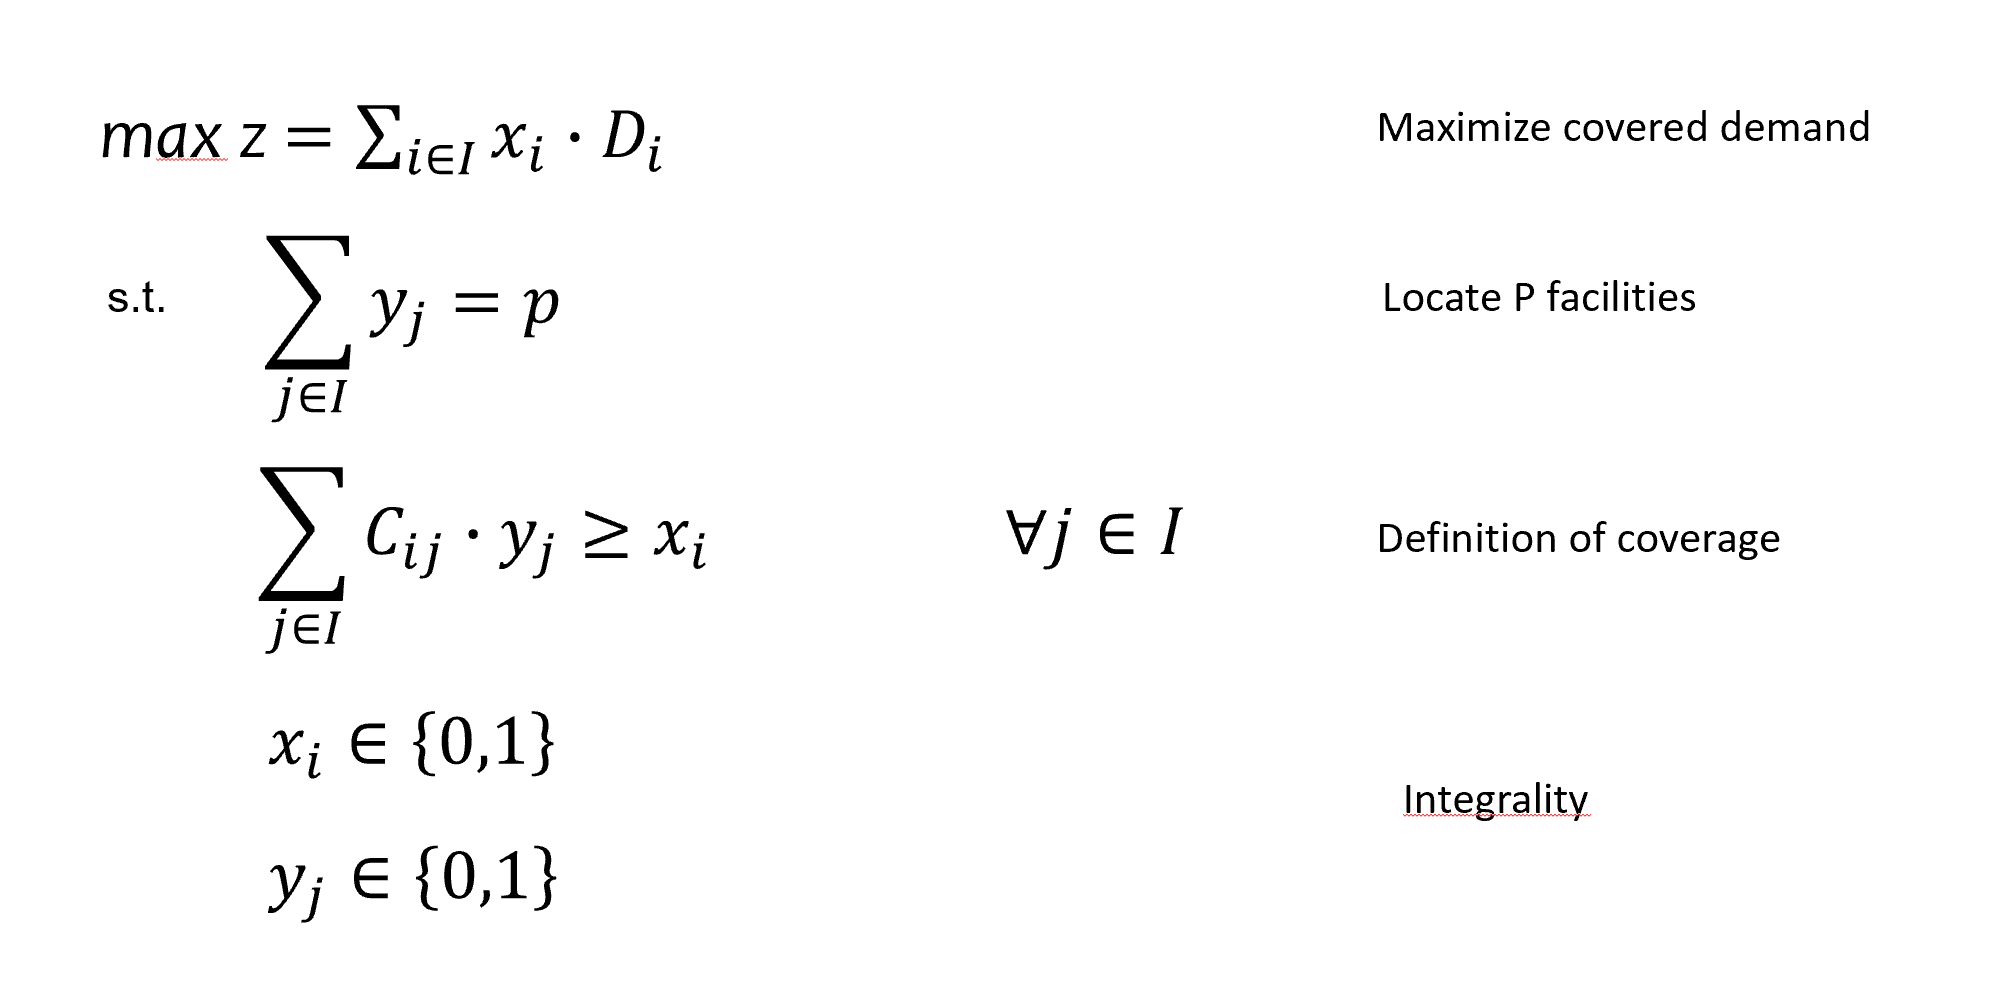

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c gurobi gurobi

Channels:
 - gurobi
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset=pd.read_csv('customer.csv', sep=";") #import the customers' database I
dataset.head()

,CUSTOMER,XCOORD,YCOORD,DEMAND
0,1,42.352345,10.245678,13
1,2,41.987654,12.098765,19
2,3,43.123456,6.567890,5
3,4,45.098765,15.432109,3
4,5,40.876543,9.876543,11


In [7]:
n=len(dataset) #number of clients

In [8]:
n

20

In [9]:
R=150 #coverage radius defined in Km

In [10]:
p=3 #number of facilities to open

In [11]:
N = [i for i in range(0, n)] #number of customers

In [12]:
N

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [13]:
dataset2=pd.read_csv('facility.csv', sep=";") #import the dataset regarding the possible facilities J
m=len(dataset2) #number of available facilities

In [14]:
dataset2.head()

,FACILITY,XCOORD,YCOORD
0,A,42.435678,12.543210
1,B,45.123456,7.654321
2,C,41.890123,13.987654
3,D,43.210987,9.876543
4,E,40.567890,15.098765


In [15]:
M = [i for i in range(0, m)] 

In [16]:
M #candidate facilities

[0, 1, 2, 3, 4, 5]

In [17]:
q={i: dataset.iloc[i]['DEMAND'] for i in N} #extraction of customer demand
#q = {i: rnd.randint(1, 10) for i in N}

In [18]:
q

{0: 13.0,
 1: 19.0,
 2: 5.0,
 3: 3.0,
 4: 11.0,
 5: 5.0,
 6: 8.0,
 7: 17.0,
 8: 3.0,
 9: 5.0,
 10: 2.0,
 11: 1.0,
 12: 3.0,
 13: 4.0,
 14: 1.0,
 15: 7.0,
 16: 5.0,
 17: 20.0,
 18: 1.0,
 19: 1.0}

In [19]:
xc = dataset['XCOORD'].tolist() #extract locations
yc = dataset['YCOORD'].tolist()

In [20]:
xc

[42.352345,
 41.987654,
 43.123456,
 45.098765,
 40.876543,
 42.56789,
 44.210987,
 41.432109,
 43.890123,
 40.345678,
 44.876543,
 42.210987,
 40.56789,
 45.765432,
 43.098765,
 41.345678,
 42.987654,
 44.432109,
 40.210987,
 45.678901]

In [21]:
yc

[10.245678,
 12.098765,
 6.56789,
 15.432109,
 9.876543,
 7.890123,
 17.654321,
 13.210987,
 8.432109,
 11.123456,
 6.890123,
 16.765432,
 14.987654,
 10.56789,
 18.210987,
 11.345678,
 15.098765,
 7.432109,
 13.876543,
 9.210987]

In [22]:
xf = dataset2['XCOORD'].tolist() #extract locations of the facilities
yf = dataset2['YCOORD'].tolist()

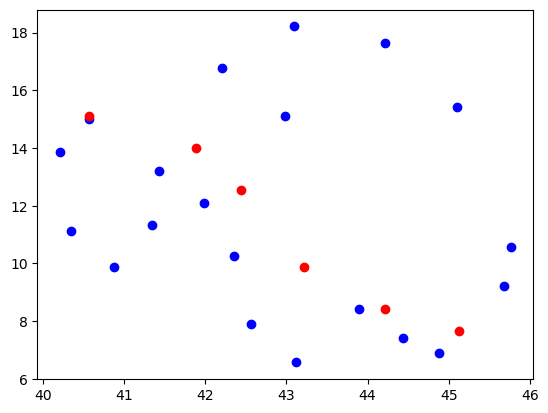

In [23]:
#plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[0:], yc[0:], c='b')
plt.scatter(xf[0:], yf[0:], c='r')

In [24]:
#Function for computing the distances starting from x and y coordinates
from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'kilometers'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kilometers':
        return round(distance * 1.609344, 2)

In [25]:
c = {(i, j): getDistanceBetweenPointsNew(xc[i], yc[i], xf[j], yf[j], 'kilometers') for i in N for j in M}
 #distance between customers and facilities

In [26]:
c

{(0, 0): 188.89,
 (0, 1): 371.81,
 (0, 2): 312.83,
 (0, 3): 100.11,
 (0, 4): 450.35,
 (0, 5): 253.48,
 (1, 0): 61.82,
 (1, 1): 499.68,
 (1, 2): 156.6,
 (1, 3): 227.11,
 (1, 4): 296.22,
 (1, 5): 386.88,
 (2, 0): 493.5,
 (2, 1): 238.68,
 (2, 2): 623.23,
 (2, 3): 268.48,
 (2, 4): 761.15,
 (2, 5): 192.62,
 (3, 0): 376.09,
 (3, 1): 610.1,
 (3, 2): 375.29,
 (3, 3): 490.24,
 (3, 4): 504.52,
 (3, 5): 562.21,
 (4, 0): 281.28,
 (4, 1): 505.55,
 (4, 2): 360.97,
 (4, 3): 259.57,
 (4, 4): 441.34,
 (4, 5): 389.16,
 (5, 0): 381.67,
 (5, 1): 284.78,
 (5, 2): 507.53,
 (5, 3): 176.91,
 (5, 4): 639.32,
 (5, 5): 187.87,
 (6, 0): 458.03,
 (6, 1): 796.74,
 (6, 2): 394.07,
 (6, 3): 634.67,
 (6, 4): 456.15,
 (6, 5): 734.61,
 (7, 0): 124.51,
 (7, 1): 608.66,
 (7, 2): 82.19,
 (7, 3): 337.99,
 (7, 4): 185.27,
 (7, 5): 497.21,
 (8, 0): 370.51,
 (8, 1): 150.36,
 (8, 2): 504.11,
 (8, 3): 138.75,
 (8, 4): 661.27,
 (8, 5): 35.68,
 (9, 0): 260.81,
 (9, 1): 601.92,
 (9, 2): 295.02,
 (9, 3): 334.94,
 (9, 4): 337.2,
 (9,

In [27]:
def CDefinition(distance, radius): #definition of the parameter Cij evluating if a node can be covered by a facility
    
        if distance<=radius :
            return 1
        else:
            return 0
            

In [30]:
C = {(i, j): CDefinition(c[i,j],R) for i in N for j in M}
            
#Computation of C to identify coverage

In [31]:
C

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 1,
 (0, 4): 0,
 (0, 5): 0,
 (1, 0): 1,
 (1, 1): 0,
 (1, 2): 0,
 (1, 3): 0,
 (1, 4): 0,
 (1, 5): 0,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 0,
 (2, 3): 0,
 (2, 4): 0,
 (2, 5): 0,
 (3, 0): 0,
 (3, 1): 0,
 (3, 2): 0,
 (3, 3): 0,
 (3, 4): 0,
 (3, 5): 0,
 (4, 0): 0,
 (4, 1): 0,
 (4, 2): 0,
 (4, 3): 0,
 (4, 4): 0,
 (4, 5): 0,
 (5, 0): 0,
 (5, 1): 0,
 (5, 2): 0,
 (5, 3): 0,
 (5, 4): 0,
 (5, 5): 0,
 (6, 0): 0,
 (6, 1): 0,
 (6, 2): 0,
 (6, 3): 0,
 (6, 4): 0,
 (6, 5): 0,
 (7, 0): 1,
 (7, 1): 0,
 (7, 2): 1,
 (7, 3): 0,
 (7, 4): 0,
 (7, 5): 0,
 (8, 0): 0,
 (8, 1): 0,
 (8, 2): 0,
 (8, 3): 1,
 (8, 4): 0,
 (8, 5): 1,
 (9, 0): 0,
 (9, 1): 0,
 (9, 2): 0,
 (9, 3): 0,
 (9, 4): 0,
 (9, 5): 0,
 (10, 0): 0,
 (10, 1): 1,
 (10, 2): 0,
 (10, 3): 0,
 (10, 4): 0,
 (10, 5): 1,
 (11, 0): 0,
 (11, 1): 0,
 (11, 2): 0,
 (11, 3): 0,
 (11, 4): 0,
 (11, 5): 0,
 (12, 0): 0,
 (12, 1): 0,
 (12, 2): 0,
 (12, 3): 0,
 (12, 4): 1,
 (12, 5): 0,
 (13, 0): 0,
 (13, 1): 0,
 (13, 2): 0,
 (13, 3

In [35]:
from gurobipy import Model, GRB, quicksum

In [36]:
mdl = Model('PCOVER') #Definition of the oprimization model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-27


In [37]:
x = mdl.addVars(N, vtype=GRB.BINARY) # decision variable definition
y = mdl.addVars(M, vtype=GRB.BINARY)

In [38]:
mdl.modelSense = GRB.MAXIMIZE #We need to maximize the objective function
mdl.setObjective(quicksum(x[i]*q[i] for i in N)) #Objective function definition


In [40]:
mdl.addConstr(quicksum(y[j] for j in M) == p) #Number of facility to open
mdl.addConstrs(quicksum(C[i, j]*y[j] for j in M)>=x[i] for i in N) #Coverage constraints

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>}

In [41]:
#mdl.Params.MIPGap = 0.1
#mdl.Params.TimeLimit = 30  # seconds
mdl.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 42 rows, 26 columns and 78 nonzeros
Model fingerprint: 0x5477c98f
Variable types: 0 continuous, 26 integer (26 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 3e+00]
Found heuristic solution: objective 55.0000000
Presolve removed 38 rows and 17 columns
Presolve time: 0.00s
Presolved: 4 rows, 9 columns, 15 nonzeros
Variable types: 0 continuous, 9 integer (9 binary)
Found heuristic solution: objective 75.0000000

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 2: 75 55 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.500000000000e+01, bes

In [42]:
covered_nodes = [a for a in N if x[a].x > 0.99]

In [43]:
covered_nodes

[0, 1, 7, 8, 10, 17, 19]

In [44]:
opened_facilities = [b for b in M if y[b].x > 0.99]

In [45]:
opened_facilities

[0, 1, 3]

In [46]:
x_covered=[xc[i] for i in covered_nodes]
y_covered=[yc[i] for i in covered_nodes]
x_openf=[xf[i] for i in opened_facilities]
y_openf=[yf[i] for i in opened_facilities]

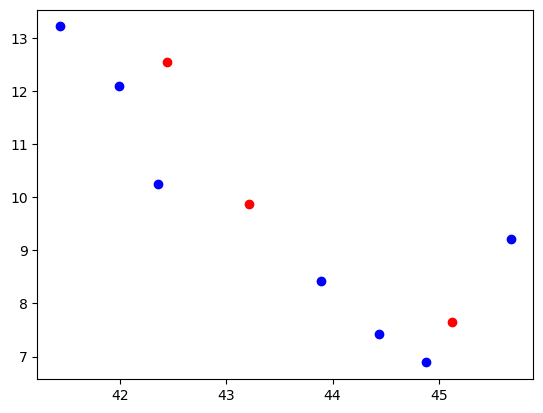

In [47]:
plt.scatter(x_covered[0:], y_covered[0:], c='b')
plt.scatter(x_openf[0:], y_openf[0:], c='r')

In [48]:
satisfied_demand=mdl.objVal

In [49]:
satisfied_demand

75.0

In [50]:
total_demand=0;
for i in N:
    total_demand=total_demand+q[i]
    

In [51]:
total_demand

134.0